In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import clear_output

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Dataset generation

# 1. 2D Rectangular grid

In [3]:
Nx = 50                                                   # Number of samples
Ny = 50                                                   # Number of samples
x = torch.linspace(0, 1, Nx)                             # Input data for x (N x 1)
y = torch.linspace(0, 1, Ny)                             # Input data for y (N x 1)
xy = torch.meshgrid(x,y)
xy_grid = torch.cat([xy[0].reshape(-1,1), xy[1].reshape(-1,1)],dim=1)

x_bdry = xy_grid[torch.logical_or((xy_grid[:,0]==1), (xy_grid[:,0]==0))]
y_bdry = xy_grid[torch.logical_or((xy_grid[:,1]==1), (xy_grid[:,1]==0))]
xy_bdry = torch.cat([x_bdry, y_bdry])
u_bdry = 0*(xy_bdry[:,0]*xy_bdry[:,1]).view(-1,1)

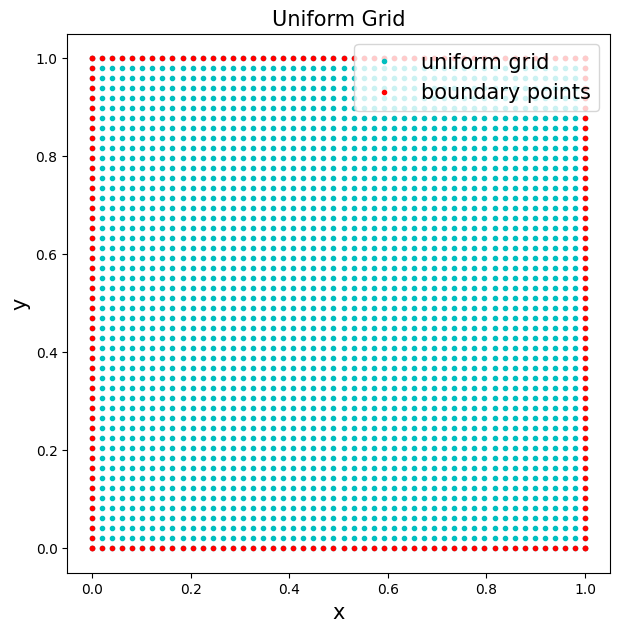

In [4]:
plt.figure(figsize=(7,7))
plt.plot(xy_grid[:,0], xy_grid[:,1], 'co', markersize=3, label='uniform grid')
plt.plot(xy_bdry[:,0], xy_bdry[:,1], 'ro', markersize=3, label='boundary points')
plt.legend(loc='upper right', fontsize=15)
plt.title('Uniform Grid', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.savefig('drm_data')

# True Green's function

In [6]:
k = 1
x_center = torch.tensor(0.3)
y_center = torch.tensor(0.7)
N_cutoff = 100
def eigenvalue(nx, ny):
    return (nx**2 + ny**2)*torch.pi**2 + k**2

def eigenfunction(x, y, nx, ny):
    return 2*torch.sin(nx*torch.pi*x.clone().detach())*torch.sin(ny*torch.pi*y.clone().detach())

def true_green(x, y, x_center, y_center):
    N_cutoff = 100
    value = 0
    for n_x in range(1, N_cutoff):
        for n_y in range(1, N_cutoff):
            value = value + eigenfunction(x, y, n_x, n_y)*eigenfunction(x_center, y_center, n_x, n_y)/eigenvalue(n_x, n_y)

    return value.clone().detach()

In [11]:
import time

xy_detach = xy_grid.cpu().detach()
xx = xy_detach[:,0]
yy = xy_detach[:,1]

start = time.time()
zz_true = true_green(xx, yy, x_center, y_center)
print(f"{time.time()-start:.4f} sec")

1.9098 sec


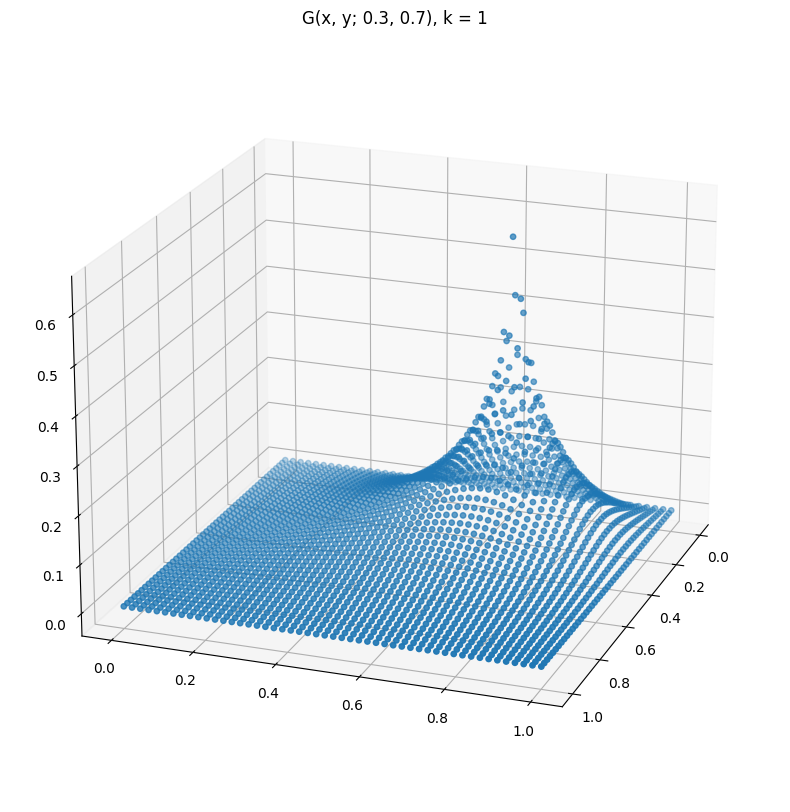

In [12]:
sizeparam = 10
fig = plt.figure(figsize=(sizeparam*3,sizeparam))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20., azim=20)
ax.scatter(xx, yy, zz_true, s=15)
plt.title("G(x, y; 0.3, 0.7), k = 1")
plt.show()

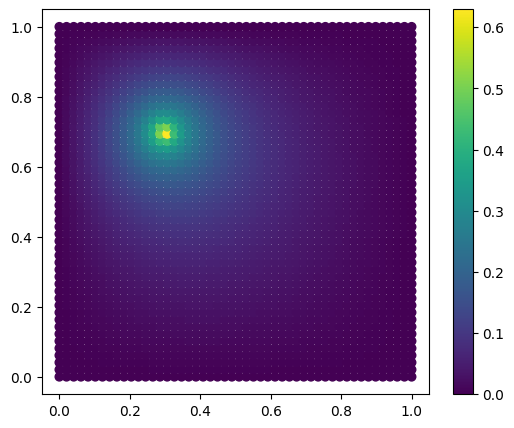

In [13]:
sizeparam = 5
plt.figure(figsize=(1.25*sizeparam,sizeparam))

plt.scatter(xx, yy, c = zz_true)
plt.colorbar()
plt.show()